Task 1:Student Pass/Fail Prediction

1.Dataset Selection

In [21]:
#Create or select a dataset with columns  Study hours,attendance,pass

import pandas as pd
import numpy as np

np.random.seed(42)
data = pd.DataFrame({
    'Study_Hours': np.random.uniform(1, 40, 100),
    'Attendance': np.random.uniform(50, 100, 100),
})
data['Pass'] = ((data['Study_Hours'] * 0.3 + data['Attendance'] * 0.7) > 60).astype(int)
data.to_csv('students.csv', index=False)


2.Tasks to perform

Study_Hours    0
Attendance     0
Pass           0
dtype: int64


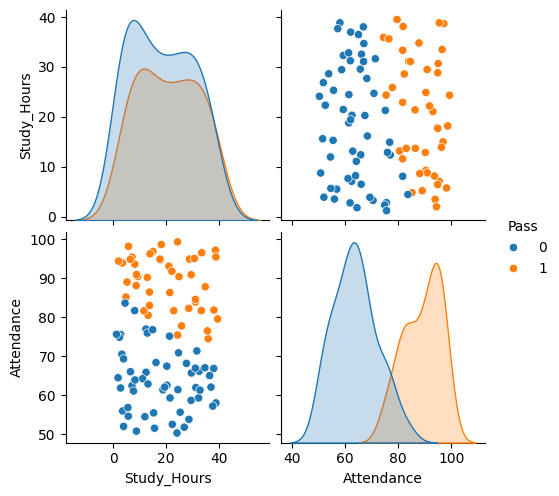

In [22]:
# 1. Data Exploration

#Check for missing values

import seaborn as sns
import matplotlib.pyplot as plt


print(data.isnull().sum())

#Plotting relationship between features

sns.pairplot(data, hue='Pass')
plt.show()


In [23]:
#Model Training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

X = data[['Study_Hours', 'Attendance']]
y = data['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 1.0


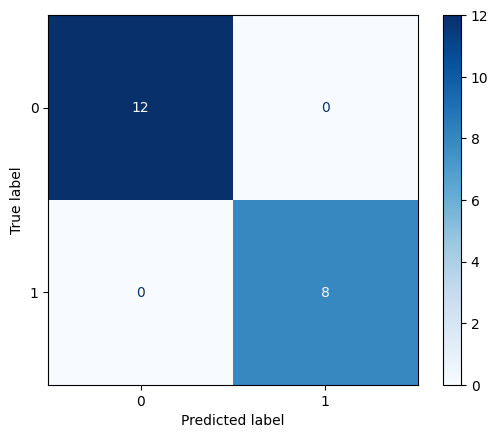

In [24]:
#Model Evaluation

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.show()


Task 2:Sentiment Analysis with Natural Language Processing

In [25]:
# 1. Dataset Selection

#Load and Preprocess the data

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

data = pd.read_csv('/content/data.csv')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return ' '.join(tokens)

data['Cleaned_Review'] = data['review'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
#Text Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
data = data.dropna(subset=['sentiment'])

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Cleaned_Review'])
data['sentiment'] = data['sentiment'].str.lower().str.strip()
y = data['sentiment'].map({'positive':1, 'negative':0,'neutral':0})



In [32]:
#Model Training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [33]:
#Model Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9380692167577414
Precision: 0.9242174629324547
Recall: 0.9092382495948136
F1 Score: 0.9166666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1030
           1       0.92      0.91      0.92       617

    accuracy                           0.94      1647
   macro avg       0.94      0.93      0.93      1647
weighted avg       0.94      0.94      0.94      1647

